# 2021-01-22_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476_rep1

Brief experiment description:

* 1:150 1.5 hours, 1:750 5 hours, 100 into 200 uL PBS for cyt.
* Testing relative levels of RPU construct in each landing pad
* All strains are sequence confirmed

Notes on experiment:

* Only testing plasmid version since landing pad versions already tested
* FITC-A is the output channel (YFP)

### Strains

#### Experiment
| strain number | parent strain | Description               | 
|---------------|---------------|-------------------------------|
| AJT476  | EcN | PJ23101-YFP on p15a backbone     |  


### Protocol

 - Overnight in M9 + kan
 - M9
     * Dilute 1:150 in 500 uL deep-well plate, grow for 1.5 hours
     * Dilute 1:750 into 500 uL in deep-well plate, grow for 5 hours
         - cells were a little dilute at end
     * 100 uL culture into 200 uL PBS + kan

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [3]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [4]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
fcs_dir = cf_imports.dir_fix(
    r'/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2021-01-22_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep3/2021-01-22_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476')
# Optional specification of conditions directory (default to same directory as data)
conds_dir = None



In [5]:
# Create experiment from fcs files and conditions file ()
exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir)

['/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-22_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep3/2021-01-22_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_A1_A01.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-22_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep3/2021-01-22_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_A2_A02.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-22_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep3/2021-01-22_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_B1_B01.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-22_EcN_LPs_RelativeExpression_M9_300min_plasmid_rep3/2021-01-22_EcN_LPs_RelativeExpression_M9_300minInduction_AJT476/Specimen_001_B2_B02.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-22_EcN_LPs_RelativeExpressio

In [6]:
# Check dataframe 
exp.data.head(10)
# exp2.data.head(10)
# exp3.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num
0,4.650000,77.0,1603.700073,1601.0,-11.100000,40.0,-59.160000,24.0,1483.349976,1345.0,51.000000,1,0.0,M9,EcN,1,A,1,AJT476-1
1,4071.540039,3926.0,12897.540039,9163.0,-19.980000,25.0,-4.080000,57.0,18524.669922,17862.0,51.000000,1,0.0,M9,EcN,1,A,1,AJT476-1
2,-62.310001,31.0,3335.380127,2131.0,-13.320000,19.0,-6.120000,55.0,1482.420044,1567.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1
3,4151.520020,3951.0,12386.410156,8643.0,-15.540000,42.0,-7.140000,35.0,19979.189453,19115.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1
4,40.920002,74.0,2617.270020,2198.0,-31.080000,20.0,17.340000,32.0,2596.560059,1994.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1
5,-60.450001,19.0,3012.270020,1598.0,28.860001,47.0,-88.739998,34.0,790.500000,762.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1
6,3683.729980,3426.0,12800.370117,10139.0,22.940001,35.0,-39.779999,47.0,21968.460938,20774.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1
7,29.760000,76.0,2324.969971,2800.0,-5.920000,29.0,36.720001,41.0,714.239990,784.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1
8,6177.060059,5758.0,15348.910156,10738.0,5.920000,47.0,-4.080000,34.0,37944.929688,34682.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1
9,6076.620117,5667.0,12220.510742,10126.0,-14.060000,27.0,-69.360001,22.0,29693.970703,27678.0,51.200001,1,0.0,M9,EcN,1,A,1,AJT476-1


In [7]:
exp.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp2.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp3.data.groupby(['parent_strain','strain_num', 'iptg']).size()

parent_strain  strain_num  iptg
EcN            AJT476-1    0.0     192998
               AJT476-2    0.0     190968
dtype: int64

## Gating

### FSC / SSC

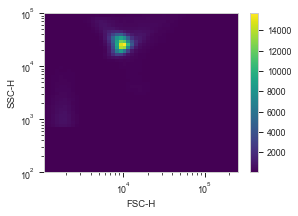

In [8]:
scatter = flow.DensityView(
    xchannel = "FSC-H",
    ychannel = "SSC-H",
    yscale = "log",
    xscale = "log")

scatter.plot(exp, ylim=(100,100000))

Gate FSC-A / SSC-A w/ Guassian w/ 2 sigma stddeviation

In [9]:
g2 = flow.PolygonOp(name = "Debris_Filter",
                    xchannel = "FSC-H",
                    ychannel = "SSC-H",
                    xscale = 'log',
                    yscale = 'log')

g2.vertices = [(4000, 10000), # bottom left
             (18000, 18000), # bottom right
             (18000, 55000), # top right
             (4000, 35000)] # top left

In [10]:
# for polygon gating as opposed to using Gaussian mixture model
exp_gated = g2.apply(exp)

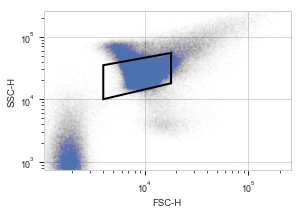

In [11]:
# takes a minute or two to run
g2.default_view().plot(exp_gated, alpha = 0.002)

In [12]:
exp_gated.data.head(10)
# exp2_gated.data.head(10)
# exp3_gated.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
0,4.650000,77.0,1603.700073,1601.0,-11.100000,40.0,-59.160000,24.0,1483.349976,1345.0,51.000000,1,0.0,M9,EcN,1,A,1,AJT476-1,False
1,4071.540039,3926.0,12897.540039,9163.0,-19.980000,25.0,-4.080000,57.0,18524.669922,17862.0,51.000000,1,0.0,M9,EcN,1,A,1,AJT476-1,True
2,-62.310001,31.0,3335.380127,2131.0,-13.320000,19.0,-6.120000,55.0,1482.420044,1567.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1,False
3,4151.520020,3951.0,12386.410156,8643.0,-15.540000,42.0,-7.140000,35.0,19979.189453,19115.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1,True
4,40.920002,74.0,2617.270020,2198.0,-31.080000,20.0,17.340000,32.0,2596.560059,1994.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1,False
5,-60.450001,19.0,3012.270020,1598.0,28.860001,47.0,-88.739998,34.0,790.500000,762.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1,False
6,3683.729980,3426.0,12800.370117,10139.0,22.940001,35.0,-39.779999,47.0,21968.460938,20774.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1,True
7,29.760000,76.0,2324.969971,2800.0,-5.920000,29.0,36.720001,41.0,714.239990,784.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1,False
8,6177.060059,5758.0,15348.910156,10738.0,5.920000,47.0,-4.080000,34.0,37944.929688,34682.0,51.099998,1,0.0,M9,EcN,1,A,1,AJT476-1,True
9,6076.620117,5667.0,12220.510742,10126.0,-14.060000,27.0,-69.360001,22.0,29693.970703,27678.0,51.200001,1,0.0,M9,EcN,1,A,1,AJT476-1,True


In [13]:
# should use Debris_Filter_2 if using Gaussian Mixture Model, otherwise Debris_Filter
exp_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()
# exp2_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()

Debris_Filter  parent_strain  strain_num  media  iptg
False          EcN            AJT476-1    M9     0.0      51657
                              AJT476-2    M9     0.0      49617
True           EcN            AJT476-1    M9     0.0     141341
                              AJT476-2    M9     0.0     141351
dtype: int64

In [14]:
exp_gated_df = exp_gated.data
# exp2_gated_df = exp2_gated.data

filtered  = exp_gated_df[(exp_gated_df['Debris_Filter']==True)&(exp_gated_df['strain_num']!='blank')]
#picked debris filter that looked best qualitatitvely and excluded blank wells

# filtered.head(10)
filtered.tail(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
383951,4905.750000,4469.0,10695.810547,10200.0,2.220000,19.0,-84.659996,27.0,25985.130859,24456.0,1432.699951,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383953,4159.890137,3996.0,8214.419922,8288.0,12.580000,42.0,-4.080000,51.0,22179.570312,20304.0,1432.800049,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383955,4663.020020,4506.0,10872.770508,11398.0,-2.220000,39.0,-6.120000,55.0,25655.910156,24262.0,1432.800049,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383956,2260.830078,2153.0,7013.620117,7217.0,-4.440000,23.0,71.400002,40.0,15706.770508,14854.0,1432.800049,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383957,4771.830078,4449.0,9296.720703,10172.0,-19.240000,23.0,-3.060000,47.0,25380.630859,23276.0,1432.900024,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383958,6322.140137,5950.0,8146.479980,8914.0,-32.560001,19.0,80.580002,47.0,33586.949219,31518.0,1432.900024,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383959,3419.610107,3199.0,11128.730469,10403.0,10.360001,42.0,64.260002,78.0,24423.660156,23195.0,1432.900024,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383961,5365.169922,5030.0,10370.330078,13339.0,39.220001,42.0,27.539999,39.0,30418.439453,28646.0,1432.900024,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383962,3403.800049,3291.0,9875.000000,10631.0,28.120001,47.0,-23.459999,34.0,20752.019531,19527.0,1433.000000,2,0.0,M9,EcN,1,C,6,AJT476-2,True
383963,5743.680176,5421.0,8447.470703,10049.0,-6.660000,18.0,-53.040001,22.0,33027.089844,30289.0,1433.000000,2,0.0,M9,EcN,1,C,6,AJT476-2,True


# Start from here

In [15]:
## pickle allows you to save an object as binary so it can be re-opened next time without re-running
## all of the code that loaded it

pickle.dump(exp_gated_df, open("pickledata_gated.p", "wb")) # wb is for writing binary
# exp_gated_df = pickle.load(open("pickledata_gated.p", "rb")) # rb is for reading binary

# # pickle.dump(exp2_gated_df, open("pickledata2_gated.p", "wb")) # wb is for writing binary
# exp2_gated_df = pickle.load(open("pickledata2_gated.p", "rb")) # rb is for reading binary

pickle.dump(filtered, open("pickledata_filtered.p", "wb")) # wb is for writing binary
# filtered = pickle.load(open("pickledata_filtered.p", "rb")) # rb is for reading binary

## Calculating Medians

In [16]:
parent = sorted(filtered['parent_strain'].unique()) # get strain numbers in experiment
print(parent)

['EcN']


In [17]:
strains = sorted(filtered['strain_num'].unique()) # get strain numbers in experiment
print(strains)

['AJT476-1', 'AJT476-2']


In [18]:
media = sorted(filtered['media'].unique()) # get media used in experiment
print(media)

['M9']


In [19]:
data_dict = dict() # initiate dictionary

# make  nested dictionary with medians in it for each condition (media, inducer, concentration, strain)
for s in strains:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_dict[s] = q['FITC-A'].median()
    
data = pd.Series(data_dict)

In [20]:
# pickle.dump(data, open("data.p", "wb")) # wb is for writing binary

In [21]:
data_dict

{'AJT476-1': 5088.9599609375, 'AJT476-2': 5112.2099609375}

In [22]:
# # controls['M9']['EcN'].loc[[~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])],'AJT206']
# print(controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])])
# auto = (controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])]).mean(axis=0)


# # print(controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])])
# # RPUg = (controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])]).mean(axis=0)

%store -r AJT206_auto_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
# %store -r AJT280_RPUg_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
auto = AJT206_auto_store
# RPUg = AJT280_RPUg_store

print()
print(auto)
# print(RPUg)

no stored variable # from 2020-09-22_EcN_Sensors_AllReplicates_v2

33.25156319141388


In [23]:
data['AJT476-1']

5088.9599609375

In [24]:
# AJT476_r3_au_store = data['AJT476-1']

# %store AJT476_r3_au_store


Stored 'AJT476_r3_au_store' (float64)


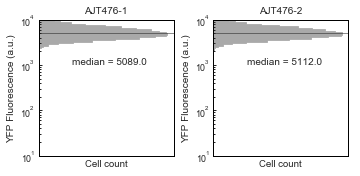

In [25]:
## Histogram-style transfer functions like in Cello SI

data_his_dict = dict() # initiate dictionary

fig_his, ax_his = plt.subplots(1,2, figsize=(5,2.5)) # row, column format
plt.tight_layout() #tidies up spacing between plots

for s in strains:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_his_dict[s] = q['FITC-A']
                    
    FP = ax_his[strains.index(s)]

    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

#                 print(strains_subset.index(s), inducer_info[i]['conc'].index(c))
    logbins = np.geomspace(10,10000,100)
    FP.hist(q['FITC-A'], 
               bins = logbins, 
               orientation='horizontal',
               color = 'darkgray',
               edgecolor = 'darkgray',
               zorder=-1)
    FP.set_yscale('log')
    FP.set_ylim(10,10000)
    FP.tick_params(axis='both',which='both', 
                               bottom=False,top=False,
                               labelbottom=False,
                               right=False,left=False,
                               labelleft=False)
    FP.grid(False)
    FP.set_ylabel('YFP Fluorescence (a.u.)', size=10)
    FP.set_xlabel('Cell count')
    FP.set_title(s, size = 10)
    FP.tick_params(axis='y',which='major',left=True, length=3, width=1, labelleft=True, direction='in')
    FP.tick_params(axis='y',which='minor', left=True, length=1.5, width=1, direction='in')     
    
    xmin, xmax = FP.get_xlim()
    FP.set_xlim(xmin,xmax)
    FP.hlines(data[s],xmin,xmax, linewidth = 0.5)
    FP.text(xmax/4,data[s]/5,'median = {}'.format(round(data[s], 0)), size = 10)

                
                

In [26]:
# fig_his.savefig('RPUconstruct_RelativeExpression_plasmid.pdf', bbox_inches = "tight", transparent = True)
